In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

Generate the data to play around with

In [ ]:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
data = np.concatenate((a, b),)
print(data.shape)  # 150 samples with 2 dimensions
plt.scatter(data[:,0], data[:,1])
plt.show()

Perform hierarchical clustering.

In [ ]:
clustered_data = linkage(data, 'ward')

Create the dendrogram

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    clustered_data,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

A fancy function for a fancy dendrogram

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
max_d = 17
plt.figure(figsize=(10, 10))
fancy_dendrogram(
    clustered_data,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

Generate the labels for scatter plot

In [ ]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(clustered_data, max_d, criterion='distance')

In [ ]:
df = pd.DataFrame(data)
#df['clustering'] = clusters
df['cluster']=clusters

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['cluster'])

Extract the first cluster for analysis

In [ ]:
first_cluster_df = df[df['cluster']==1].iloc[:,:2]
plt.scatter(first_cluster_df[0], first_cluster_df[1])
plt.ylim(-5, 25)
plt.xlim(-4, 20)
plt.show()

Perform PCA on the first cluster

In [ ]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(first_cluster_df)
pca = model.transform(first_cluster_df)

Illustrate the PCA transformation on the first cluster

In [ ]:
mean = model.mean_
first_component = model.components_[0]
second_component = model.components_[1]
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['cluster'])
plt.arrow(mean[0], mean[1], first_component[0], first_component[1], color = 'red', width = 0.2)
plt.arrow(mean[0], mean[1], second_component[0], second_component[1], color = 'red', width =0.2)
plt.show()

# BREAST CANCER DATA 

import breast cancer data from sklean datasets

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_df.head()

Scale data for analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(cancer_df)
#pd.DataFrame(scaled_data, columns=cancer['feature_names'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed_cancer_data = pca.fit_transform(scaled_data)
plt.scatter(transformed_cancer_data[:,0], transformed_cancer_data[:,1], c=cancer['target'])
print(transformed_cancer_data.shape)

Extract one cluster 

In [ ]:
transformed_df = pd.DataFrame(transformed_cancer_data)
transformed_df['cluster']=cancer['target']
first_cancer_cluster = transformed_df[transformed_df['cluster']==0].iloc[:,:2]
plt.scatter(first_cancer_cluster[0], first_cancer_cluster[1])

In [ ]:
components_table = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
components_table.head()



In [ ]:
pca.components_

In [ ]:
sns.heatmap(components_table, cmap = 'coolwarm')


# CSV file analysis


In [2]:
df = pd.read_csv('/Users/sharplab/tran/neuron_stats.csv')
df.head()

,spike_cluster,CV ISI,Firing Rate,recording,SW_peak,SW_return,SW_troff,base_min_amp,min_max_amp,spike_type
0,435,1.089054,0.605134,2018-04-10_391b,NaN,0.800000,0.266667,611.518420,NaN,down_up
1,444,1.914232,0.211107,2018-04-10_391b,NaN,NaN,NaN,NaN,NaN,up_down_up
2,456,0.937104,0.068662,2018-04-10_391b,NaN,NaN,NaN,NaN,NaN,up_down_up
3,457,0.465151,16.016615,2018-04-10_391b,NaN,0.566667,0.333333,474.025089,NaN,down_up
4,459,2.235703,3.146396,2018-04-10_391b,NaN,0.300000,0.200000,543.436868,NaN,down_up


### Only take the non null clusters

In [3]:
df = df[pd.notnull(df['SW_troff'])]
df.head()

,spike_cluster,CV ISI,Firing Rate,recording,SW_peak,SW_return,SW_troff,base_min_amp,min_max_amp,spike_type
0,435,1.089054,0.605134,2018-04-10_391b,NaN,0.800000,0.266667,611.518420,NaN,down_up
3,457,0.465151,16.016615,2018-04-10_391b,NaN,0.566667,0.333333,474.025089,NaN,down_up
4,459,2.235703,3.146396,2018-04-10_391b,NaN,0.300000,0.200000,543.436868,NaN,down_up
5,461,1.051972,2.454226,2018-04-10_391b,0.1,0.433333,0.300000,485.604273,581.708,up_down_up
6,463,0.500654,0.752866,2018-04-10_391b,NaN,0.733333,0.333333,305.698058,NaN,down_up


In [12]:
recordings = df['recording'].unique()
recordings

array(['2018-04-10_391b', '2018-04-11_371a', '2018-04-12_371b',
       '2018-04-16_401b', '2018-04-17_401c', '2018-04-18_40.1a'],
      dtype=object)

### Separate the recordings

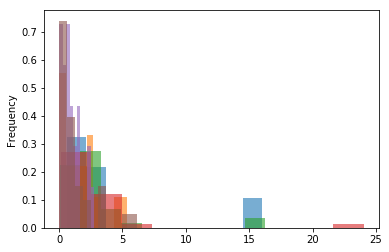

In [39]:
df.groupby('recording')['Firing Rate'].plot(kind='hist', density = True, alpha=0.6)
plt.show()

In [46]:
for a, b in enumerate(recordings):
    print(a)
    print(b)
    print()

0
2018-04-10_391b

1
2018-04-11_371a

2
2018-04-12_371b

3
2018-04-16_401b

4
2018-04-17_401c

5
2018-04-18_40.1a



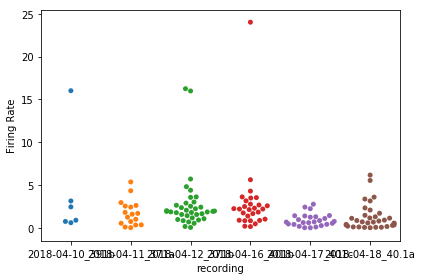

In [56]:
sns.swarmplot(data=df, x='recording', y='Firing Rate')
plt.tight_layout()


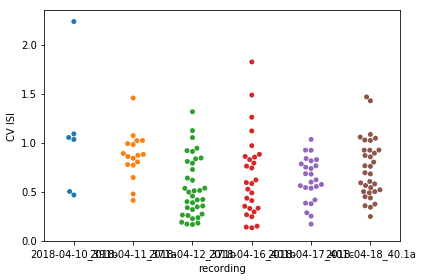

In [59]:
sns.swarmplot(data=df, x='recording', y='CV ISI')
plt.tight_layout()

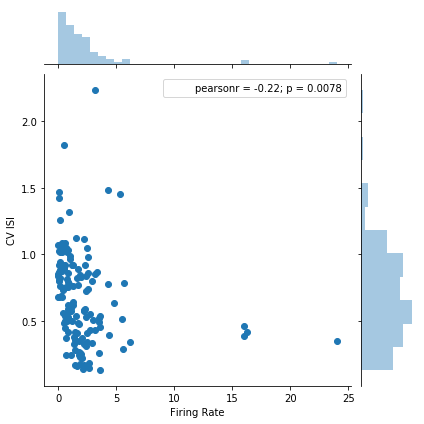

In [63]:
sns.jointplot(data=df, x='Firing Rate', y='CV ISI')

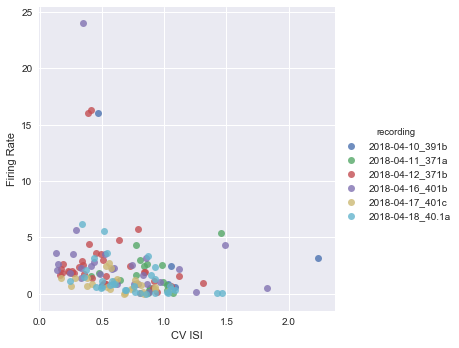

In [89]:
sns.set()
sns.lmplot(data=df, x='CV ISI', y='Firing Rate', fit_reg=False, hue='recording')


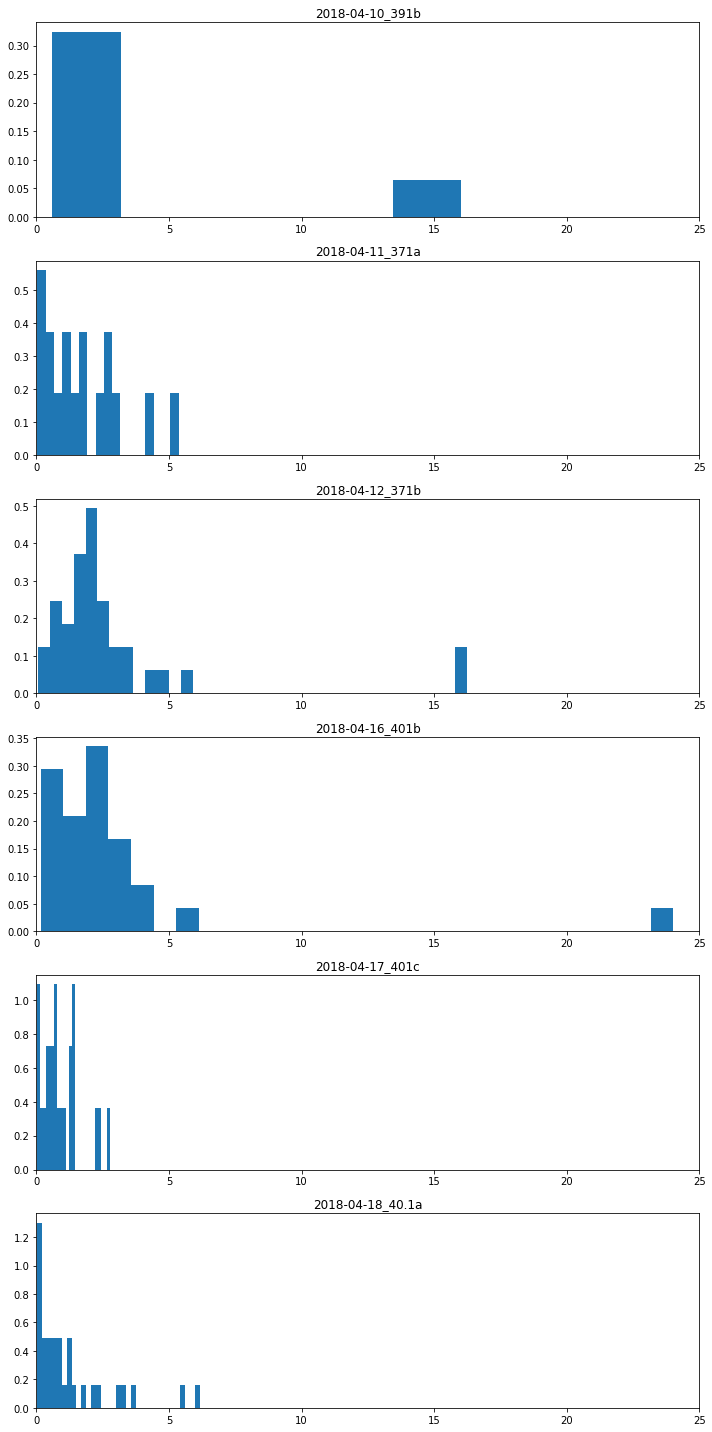

In [54]:
F, a = plt.subplots(ncols=1, nrows=6, figsize=(10,20))
df['recording'].unique()
for index, recording in enumerate(recordings):
    temp_df= df[df['recording']==recording]
    a[index].hist(temp_df['Firing Rate'], density=True, bins=len(temp_df))
    a[index].set_xlim([0, 25])
    plt.savefig(sep.join(fig_to_save))
    plt.close()
    
plt.tight_layout()
plt.show()

In [23]:

def separate_recording(df):
    gb = df.groupby('recording')    
    [gb.get_group(record) for record in gb.groups]

In [24]:
separate_recording(df)

In [16]:
df1 = df[df['recording']=='2018-04-10_391b']
df1.shape

(6, 10)

In [18]:
df2 = df[df['recording']=='2018-04-11_371a']
df2.shape

(17, 10)

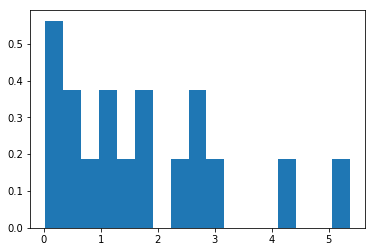

In [31]:
plt.hist(df2['Firing Rate'], bins=len(df2), density=True)
plt.show()

In [ ]:
data = pd.concat([df['CV ISI'], df['Firing Rate'], df['SW_return'], df['SW_troff'], df['base_min_amp']], axis=1)

In [ ]:
data.head()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(scaled_data)
plt.scatter(transformed_data[:,0], transformed_data[:,1])


In [ ]:
from sklearn.cluster import KMeans
ks = range(1, 12)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(transformed_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
new_model = KMeans(n_clusters=4)
labels = new_model.fit_predict(transformed_data)
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=labels)

In [ ]:
components_table = pd.DataFrame(pca.components_, columns = data.keys())

In [ ]:
sns.heatmap(components_table, cmap = 'coolwarm')

In [ ]:
clustered_data = linkage(scaled_data, 'ward')

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    clustered_data,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [71]:

def mapper(row):
    if row['CV ISI'] <= 0.55:
        reg = 'regulular'
    else:
        reg = 'irregular'
        
    if row['Firing Rate'] <= 4.5:
        rate = 'slow'
    else:
        rate = 'fast'
        
    return ' '.join([rate, reg])

In [72]:
df['category'] = df.apply(mapper, axis=1)

In [78]:
df.groupby('category').describe()

CV ISI                                                    \
                count      mean       std       min       25%       50%   
category                                                                  
fast irregular    3.0  0.960746  0.434847  0.637971  0.713503  0.789036   
fast regulular    7.0  0.395377  0.077493  0.292924  0.345133  0.386248   
slow irregular   83.0  0.894456  0.273211  0.552113  0.744879  0.854331   
slow regulular   52.0  0.361448  0.128059  0.130452  0.254109  0.373891   

                                   Firing Rate             ...   min_max_amp  \
                     75%       max       count       mean  ...           75%   
category                                                   ...                 
fast irregular  1.122133  1.455231         3.0   5.294820  ...           NaN   
fast regulular  0.439957  0.518287         7.0  12.800120  ...    414.184818   
slow irregular  1.020622  2.235703        83.0   1.128549  ...    332.189273   
slow regulular  0.487106  0.541001        52.0   1.980083  ...    428.850727   

                           spike_cluster                                      \
                       max         count        mean         std   min   25%   
category                                                                       
fast irregular         NaN           3.0  100.333333  102.246434  22.0  42.5   
fast regulular  460.630182           7.0  179.571429  190.236570  14.0  36.0   
slow irregular  581.708000          83.0  135.313253  170.358870   0.0  27.5   
slow regulular  794.402909          52.0  163.211538  154.922287   0.0  47.0   

                                     
                  50%    75%    max  
category                             
fast irregular   63.0  139.5  216.0  
fast regulular  130.0  292.0  457.0  
slow irregular   60.0  106.0  498.0  
slow regulular  113.5  246.5  506.0  

[4 rows x 64 columns]

In [97]:
df_slow_irregular = df[df['category']== 'slow irregular']


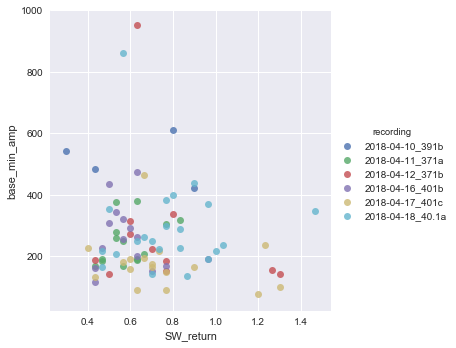

In [88]:
sns.set()
sns.lmplot(data=df_slow_irregular, x='SW_return', y='base_min_amp', fit_reg=False, hue='recording')